In [5]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
from keras.optimizers import SGD

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

model = Sequential([
  Conv2D(8, 3, input_shape=(28, 28, 1), use_bias=False),
  MaxPooling2D(pool_size=2),
  Flatten(),
  Dense(10, activation='softmax'),
])

model.compile(SGD(lr=.005), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size=1,
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3


/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


60000/60000 [==============================] - 117s 2ms/step - loss: 0.2444 - accuracy: 0.9263 - val_loss: 0.1405 - val_accuracy: 0.9580
Epoch 2/3
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1172 - accuracy: 0.9647 - val_loss: 0.0901 - val_accuracy: 0.9723
Epoch 3/3
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0915 - accuracy: 0.9722 - val_loss: 0.0803 - val_accuracy: 0.9732


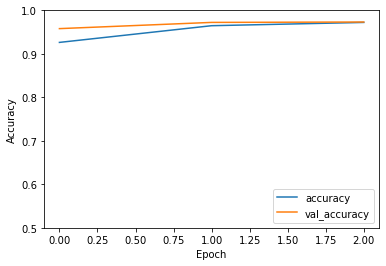

ValueError: in user code:

    File "/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1790, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/codetrade/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluating model performance on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


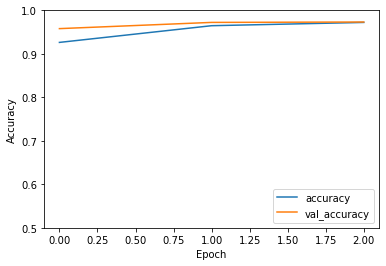

NameError: name 'target_array' is not defined

In [12]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
# Plotting accuracy history during training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
target_encoded = to_categorical(target_array, num_classes=num_classes)

# Evaluating model performance on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
